# AM 207: LUNA
## NLM Experiments

In [1]:
import sys; sys.path.insert(0, "..")
from src.models import NLM
from src.utils import generate_data

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

## Generate Synthetic Data

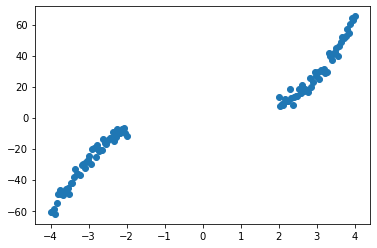

In [3]:
x, y, x_test = generate_data(number_of_points=50, noise_variance=9)

plt.scatter(x, y)
plt.show()

## Regularization

**Question**: At what regularization level does good epistemic uncertainty behavior collapse?

### Setup NLM

In [4]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

width = [50,20] # using the architecture used in the paper
hidden_layers = len(width)
input_dim = 1
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = NLM(architecture, random=random)
print('Number of parameters =',nn.D)

###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':5000, 
          'random_restarts':1}

Number of parameters = 1141


### Regularziation Parameter Search

In [5]:
reg_params = [0, 0.001, 0.01, 0.1, 1, 10, 50, 100]

In [6]:
nlms = []

for reg_param in reg_params:
    print("Regulariation parameter: {}".format(reg_param))
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params, reg_param = reg_param)
    print("")

Regulariation parameter: 0
Iteration 0 lower bound 4904.423598081617; gradient mag: 7316.856132341299
Iteration 100 lower bound 764.8270209512613; gradient mag: 1913.7022830536728
Iteration 200 lower bound 190.69022778453112; gradient mag: 517.9300561978213
Iteration 300 lower bound 141.02840704780303; gradient mag: 77.56937286630794
Iteration 400 lower bound 132.11631774177667; gradient mag: 63.594303091881464
Iteration 500 lower bound 123.30888687275521; gradient mag: 59.24888755874095
Iteration 600 lower bound 114.48198905845538; gradient mag: 54.41725143070237
Iteration 700 lower bound 105.73068579167685; gradient mag: 52.2085021019437
Iteration 800 lower bound 97.09576114842221; gradient mag: 49.25922460863199
Iteration 900 lower bound 88.63837578908189; gradient mag: 46.27664214273172
Iteration 1000 lower bound 80.39827908418648; gradient mag: 44.22939910836768
Iteration 1100 lower bound 72.07239690590853; gradient mag: 43.06593828945783
Iteration 1200 lower bound 58.396061084267

Iteration 400 lower bound 112.7217902745869; gradient mag: 50.77199940560699
Iteration 500 lower bound 104.60632776185032; gradient mag: 48.15036651299819
Iteration 600 lower bound 96.34199682907878; gradient mag: 43.397643475797715
Iteration 700 lower bound 80.41738520577995; gradient mag: 50.60991169393593
Iteration 800 lower bound 58.099285156202676; gradient mag: 49.59366518933774
Iteration 900 lower bound 32.24077825686828; gradient mag: 40.81816404847492
Iteration 1000 lower bound 16.67590390251403; gradient mag: 25.228773636707192
Iteration 1100 lower bound 11.057080560862923; gradient mag: 13.081927363021412
Iteration 1200 lower bound 9.019604028379034; gradient mag: 8.827382561246274
Iteration 1300 lower bound 8.162547143102541; gradient mag: 6.128506805810923
Iteration 1400 lower bound 7.720429649742649; gradient mag: 4.7156815107446315
Iteration 1500 lower bound 7.439072655394788; gradient mag: 5.434662201643083
Iteration 1600 lower bound 7.279603969049724; gradient mag: 5.5

Iteration 900 lower bound 45.57181319608108; gradient mag: 18.92435586477048
Iteration 1000 lower bound 40.11297858397168; gradient mag: 18.908098530408495
Iteration 1100 lower bound 38.28791404142728; gradient mag: 4.383012552863399
Iteration 1200 lower bound 37.37322821773824; gradient mag: 4.1533316694846665
Iteration 1300 lower bound 36.79714809728336; gradient mag: 3.7065009361388324
Iteration 1400 lower bound 36.29199738018811; gradient mag: 3.880315139077657
Iteration 1500 lower bound 35.7091689755636; gradient mag: 3.414253572369919
Iteration 1600 lower bound 34.92586709547204; gradient mag: 3.503870003065565
Iteration 1700 lower bound 34.26025818473138; gradient mag: 4.419631140657182
Iteration 1800 lower bound 33.761977979232626; gradient mag: 5.22714078586542
Iteration 1900 lower bound 33.39925574409037; gradient mag: 2.8351044900769153
Iteration 2000 lower bound 33.09528682386702; gradient mag: 3.7751941124688306
Iteration 2100 lower bound 32.81533245783774; gradient mag: 2

Iteration 1300 lower bound 655.4114027415163; gradient mag: 40.14335837771087
Iteration 1400 lower bound 607.5988756909725; gradient mag: 38.172720432622974
Iteration 1500 lower bound 565.5897836237363; gradient mag: 36.13707856151082
Iteration 1600 lower bound 529.3981831141796; gradient mag: 33.2822871724094
Iteration 1700 lower bound 498.73511259647097; gradient mag: 30.76584487657152
Iteration 1800 lower bound 473.286086048471; gradient mag: 28.20025634506493
Iteration 1900 lower bound 452.39893050545453; gradient mag: 25.542459635141505
Iteration 2000 lower bound 435.55379974727856; gradient mag: 23.566563466784693
Iteration 2100 lower bound 422.25116519902235; gradient mag: 21.206900661234375
Iteration 2200 lower bound 412.03336962648103; gradient mag: 19.032171991928177
Iteration 2300 lower bound 404.4406258827184; gradient mag: 16.38878294023983
Iteration 2400 lower bound 398.9807245304561; gradient mag: 17.173537903408633
Iteration 2500 lower bound 395.1545653783856; gradient 

### Trace Plots

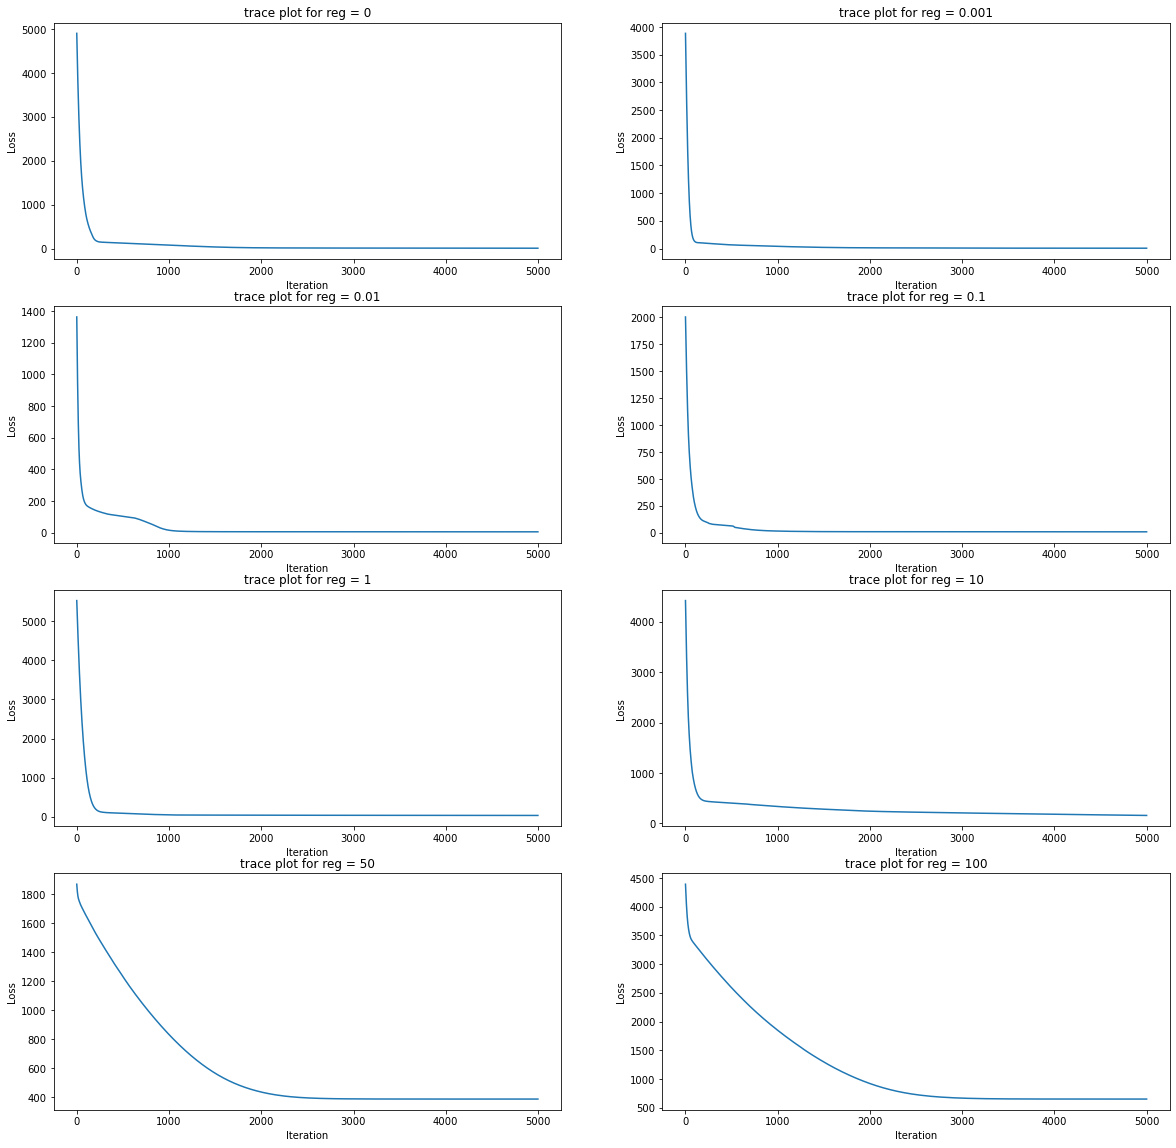

In [9]:
fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    ax.plot(nlms[i].objective_trace)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')
    ax.set_title("trace plot for reg = {}".format(reg_params[i]))

plt.show()

### MAP Models

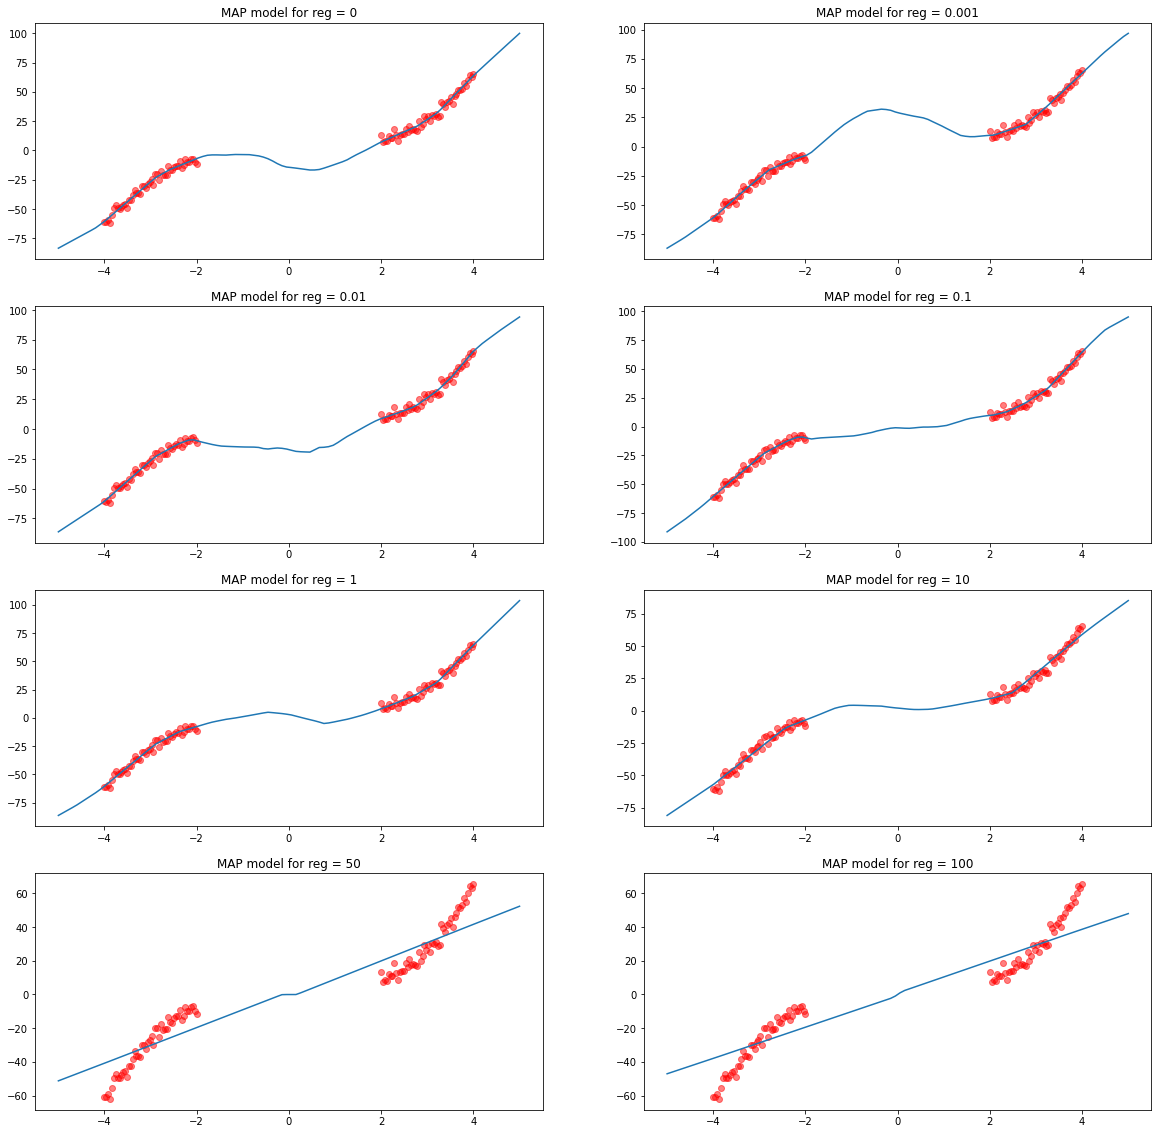

In [10]:
fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_pred = nlm.forward(nlm.weights, x_test.reshape(1,-1))

    ax.scatter(x, y, color = 'r', alpha = 0.5)
    ax.plot(x_test, y_pred.flatten())

    ax.set_title("MAP model for reg = {}".format(reg_params[i]))

plt.show()

### Prior Samples

In [11]:
prior_var = 5**2
noise_var = 3

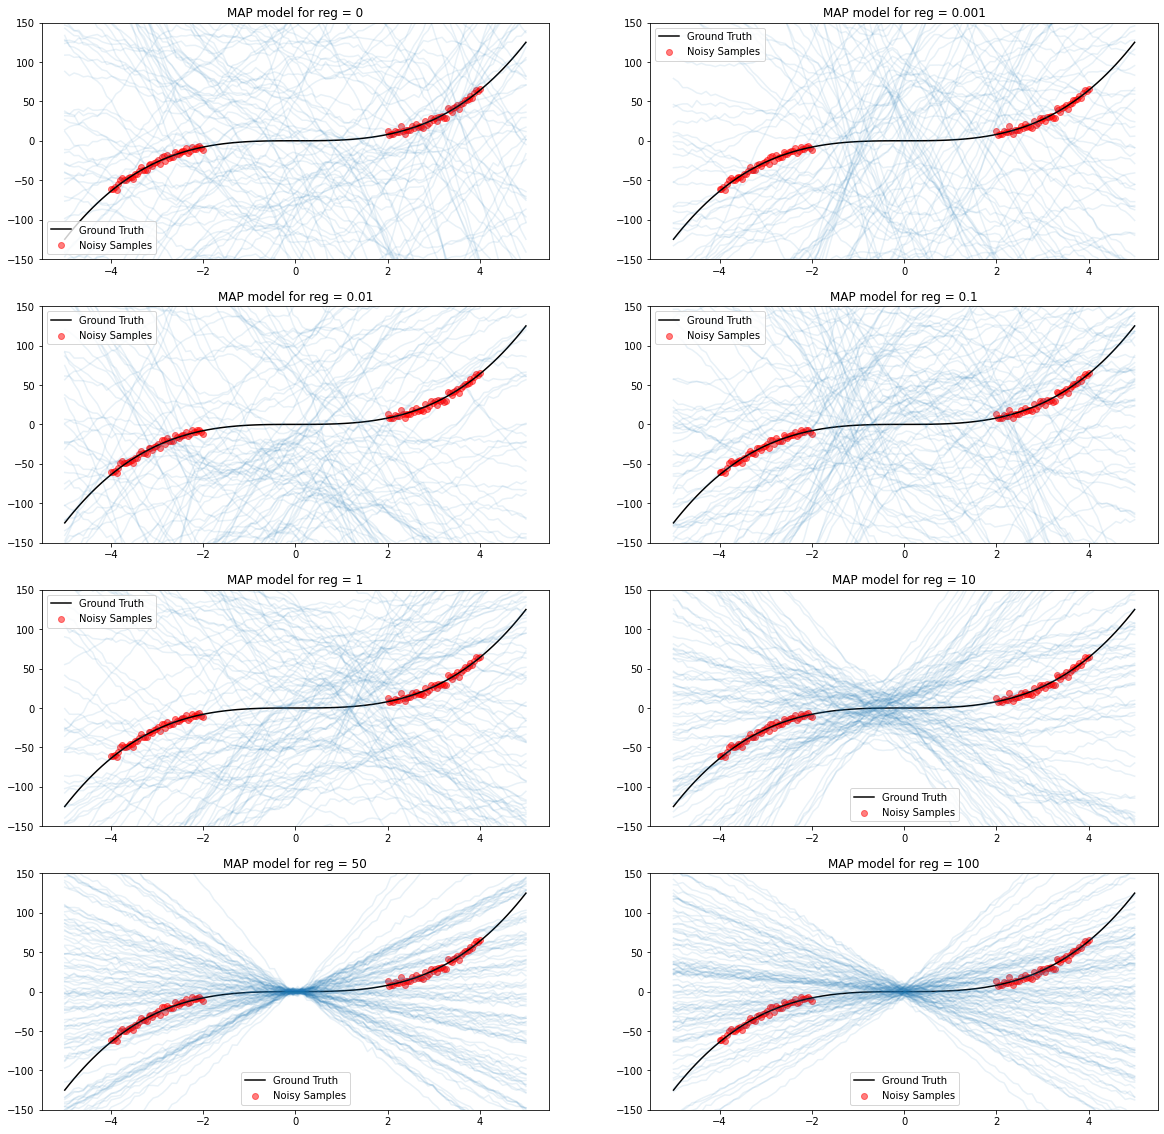

In [13]:
fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_prior = nlm.get_prior_samples(x_test, prior_var = prior_var, noise_var = noise_var)
    
    ax.scatter(x,y, color='red', alpha = 0.5, label='Noisy Samples')
    ax.plot(x_test, x_test**3, color='black', label="Ground Truth")
    ax.plot(x_test, y_prior, color='tab:blue', alpha=0.1)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("MAP model for reg = {}".format(reg_params[i]))

plt.show()

### Posterior Samples

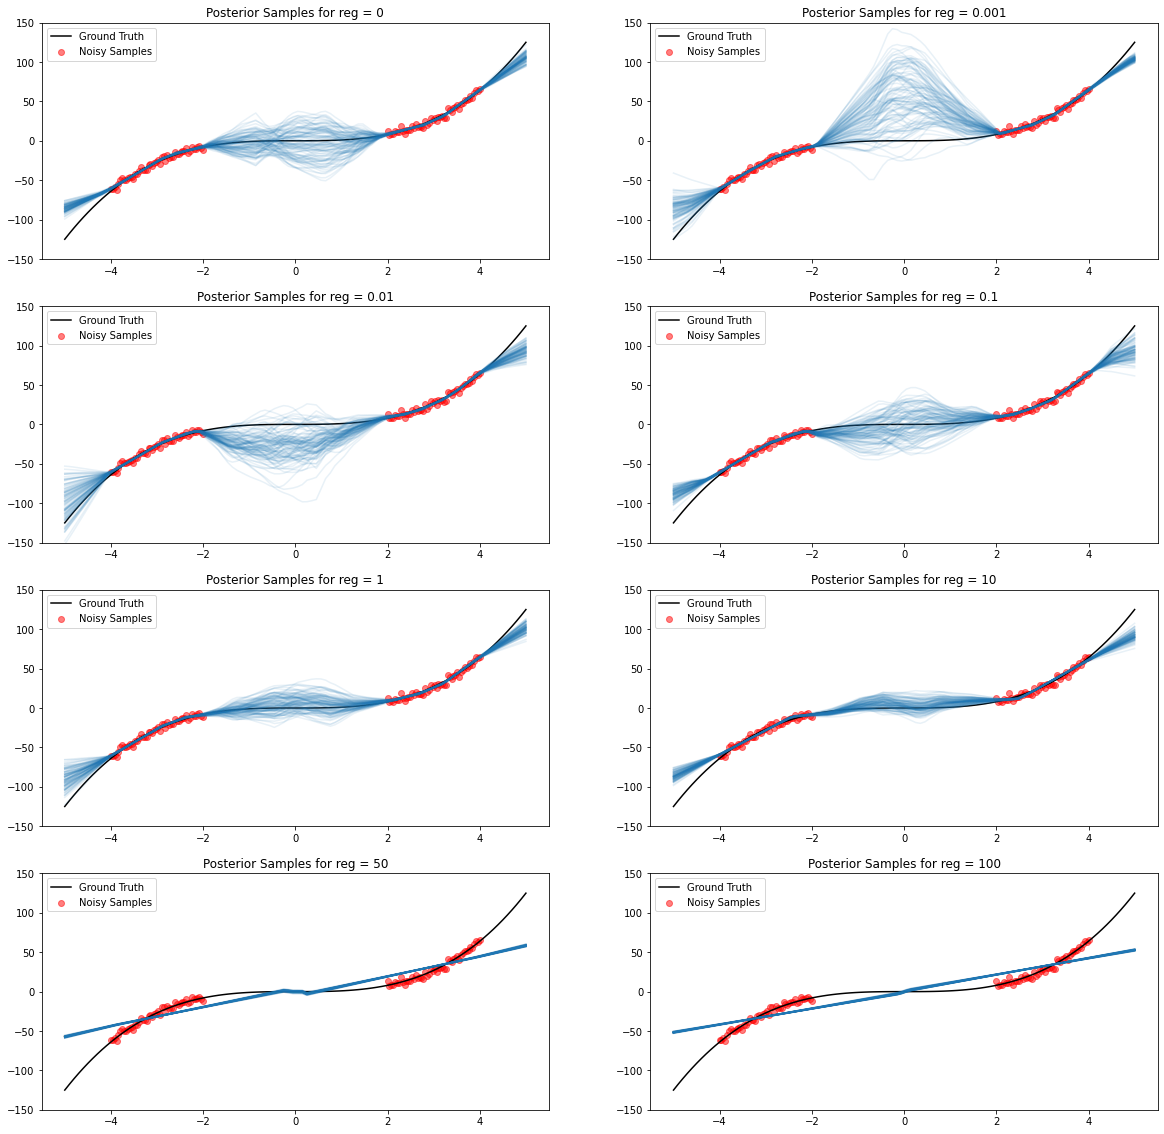

In [14]:
predictives = []

fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    joint_mean, joint_variance, posterior, predictive = nlm.perform_bayesian(x, y, x_test, prior_var = prior_var, noise_var = noise_var)

    predictives.append(predictive)
    
    ax.scatter(x, y, color='red', alpha = 0.5, label='Noisy Samples')
    ax.plot(x_test, x_test**3, color='black', label="Ground Truth")
    ax.plot(x_test, posterior.T, color='tab:blue', alpha=0.1)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("Posterior Samples for reg = {}".format(reg_params[i]))

plt.show()

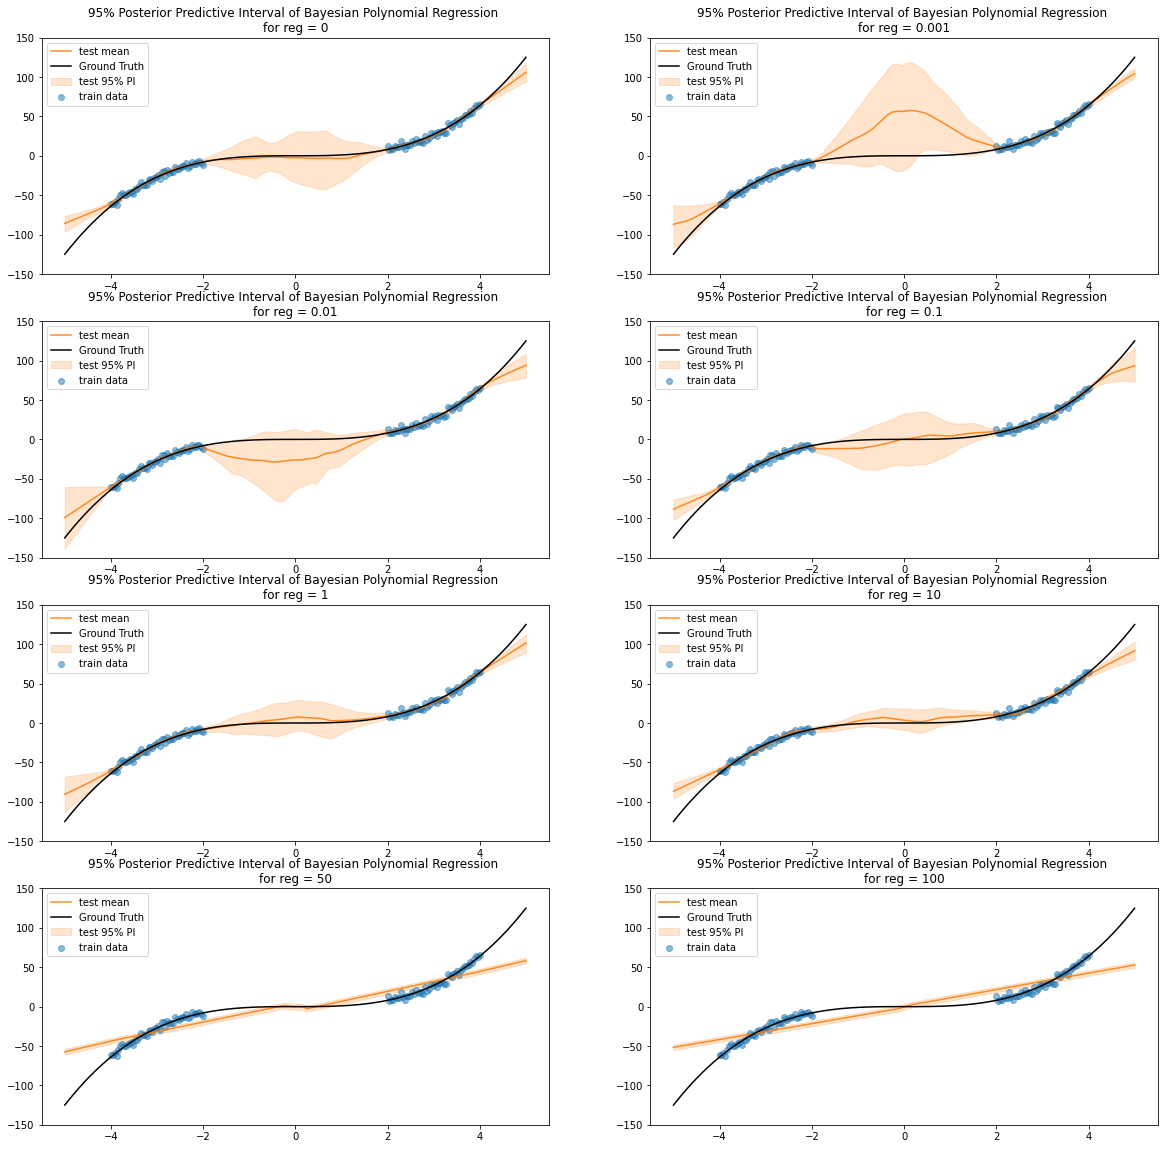

In [16]:
fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    predictive = predictives[i]
    
    # Calulating percentiles
    pp_upper = np.percentile(predictive, 97.5, axis=0)
    pp_lower = np.percentile(predictive, 2.5, axis=0)
    pp_mean = np.mean(predictive, axis=0)
    
    # Visualizing 95% posterior predictive interval of Bayesian polynomial regression
    ax.fill_between(x_test, pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
    ax.plot(x_test, pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
    ax.plot(x_test, x_test**3, color='black', label="Ground Truth")
    ax.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("95% Posterior Predictive Interval of Bayesian Polynomial Regression \nfor reg = {}".format(reg_params[i]))

plt.show()

### Regularization Parameters: [0.0001, 1]

In [17]:
reg_params = [0, 0.005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]

In [18]:
nlms = []

for reg_param in reg_params:
    print("Regulariation parameter: {}".format(reg_param))
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params, reg_param = reg_param)
    print("")

Regulariation parameter: 0
Iteration 0 lower bound 23628.121586136283; gradient mag: 32063.514102849746
Iteration 100 lower bound 4135.9091737386925; gradient mag: 11259.687362890558
Iteration 200 lower bound 443.3445620072222; gradient mag: 3513.8214011007994
Iteration 300 lower bound 71.37845736315712; gradient mag: 609.8065072183069
Iteration 400 lower bound 52.52875302964964; gradient mag: 128.66932804156372
Iteration 500 lower bound 43.48880929268639; gradient mag: 127.13907301471617
Iteration 600 lower bound 34.23549447613339; gradient mag: 144.0409419641968
Iteration 700 lower bound 27.135748523856652; gradient mag: 89.13396191185775
Iteration 800 lower bound 24.290900387667133; gradient mag: 44.7283796964743
Iteration 900 lower bound 22.329376472717986; gradient mag: 40.06488244364702
Iteration 1000 lower bound 20.547538398234; gradient mag: 35.832780434201915
Iteration 1100 lower bound 18.982273372017264; gradient mag: 34.090528847729736
Iteration 1200 lower bound 17.539263585

Iteration 400 lower bound 70.07683943266674; gradient mag: 61.655222366690914
Iteration 500 lower bound 56.64996657415818; gradient mag: 61.4218482311168
Iteration 600 lower bound 43.85097840957088; gradient mag: 56.574434382433296
Iteration 700 lower bound 33.45963461523159; gradient mag: 52.041044050618794
Iteration 800 lower bound 25.638810100730527; gradient mag: 45.86570354072956
Iteration 900 lower bound 20.09228700328422; gradient mag: 38.23890895013004
Iteration 1000 lower bound 16.19979241768544; gradient mag: 30.200343148328734
Iteration 1100 lower bound 13.490186092273404; gradient mag: 22.575729860747682
Iteration 1200 lower bound 11.812132780814423; gradient mag: 13.733542120628838
Iteration 1300 lower bound 10.598185525806038; gradient mag: 11.896826801939769
Iteration 1400 lower bound 9.69929336847964; gradient mag: 8.050549471834449
Iteration 1500 lower bound 9.141086867833316; gradient mag: 6.354417022268704
Iteration 1600 lower bound 8.745289784496002; gradient mag: 8

Iteration 800 lower bound 17.545240603399765; gradient mag: 15.965884319042905
Iteration 900 lower bound 14.130264540214695; gradient mag: 12.625781299617447
Iteration 1000 lower bound 11.810274459664742; gradient mag: 10.08341819075294
Iteration 1100 lower bound 10.459627951325228; gradient mag: 7.945490934916674
Iteration 1200 lower bound 9.491054953504191; gradient mag: 6.3447991263411945
Iteration 1300 lower bound 8.051624665974916; gradient mag: 2.8890577068681025
Iteration 1400 lower bound 7.669504377687397; gradient mag: 1.7712892391774977
Iteration 1500 lower bound 7.475791955604745; gradient mag: 2.3327343846825075
Iteration 1600 lower bound 7.119199600226712; gradient mag: 1.4205593892359845
Iteration 1700 lower bound 7.0362814159312554; gradient mag: 2.469235173038386
Iteration 1800 lower bound 7.030132518959313; gradient mag: 2.0841612978768103
Iteration 1900 lower bound 7.024438920073608; gradient mag: 2.8933754219567005
Iteration 2000 lower bound 7.018299977679958; gradie

Iteration 1200 lower bound 57.33239429623549; gradient mag: 39.26173500072411
Iteration 1300 lower bound 45.029458109908354; gradient mag: 41.23882917248203
Iteration 1400 lower bound 31.67026998330541; gradient mag: 34.09686899862939
Iteration 1500 lower bound 22.617613034408556; gradient mag: 26.614012541743364
Iteration 1600 lower bound 17.448370500158664; gradient mag: 16.729670849064654
Iteration 1700 lower bound 14.598229133868497; gradient mag: 11.501588133033604
Iteration 1800 lower bound 13.089511393398817; gradient mag: 8.646815777477931
Iteration 1900 lower bound 12.204060855733157; gradient mag: 8.07914938224422
Iteration 2000 lower bound 11.50240321687076; gradient mag: 7.0973582604778525
Iteration 2100 lower bound 10.975833490809633; gradient mag: 5.1159078430806275
Iteration 2200 lower bound 10.644729043611765; gradient mag: 3.6661241389991526
Iteration 2300 lower bound 10.268503725306978; gradient mag: 3.433183816853639
Iteration 2400 lower bound 10.0532175273343; gradi

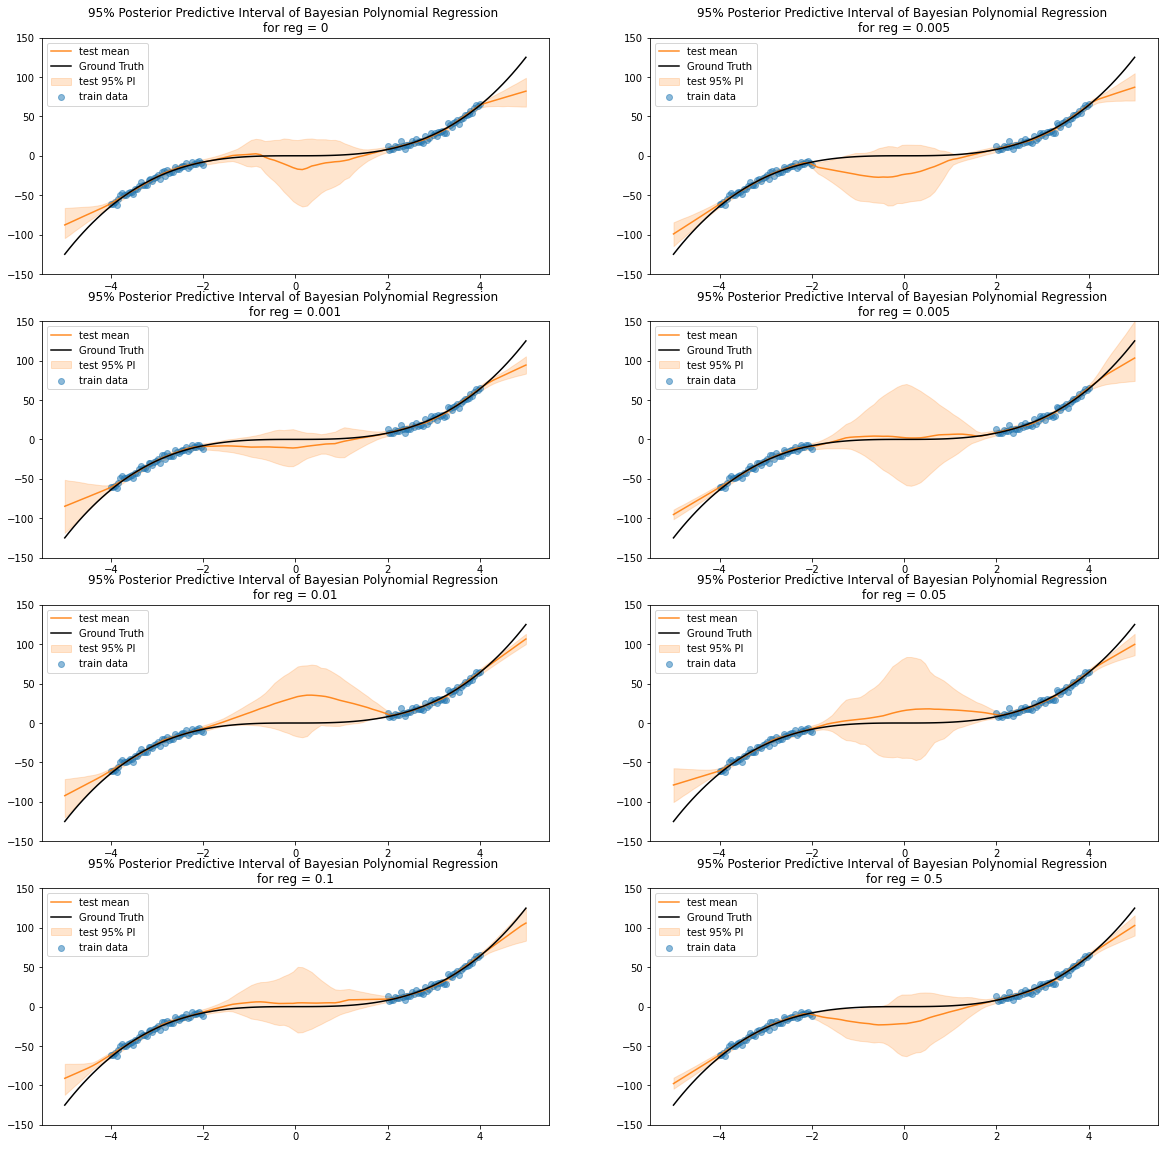

In [19]:
fig, axs = plt.subplots(4, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    joint_mean, joint_variance, posterior, predictive = nlm.perform_bayesian(x, y, x_test, prior_var = prior_var, noise_var = noise_var)
    
    # Calulating percentiles
    pp_upper = np.percentile(predictive, 97.5, axis=0)
    pp_lower = np.percentile(predictive, 2.5, axis=0)
    pp_mean = np.mean(predictive, axis=0)
    
    # Visualizing 95% posterior predictive interval of Bayesian polynomial regression
    ax.fill_between(x_test, pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
    ax.plot(x_test, pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
    ax.plot(x_test, x_test**3, color='black', label="Ground Truth")
    ax.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("95% Posterior Predictive Interval of Bayesian Polynomial Regression \nfor reg = {}".format(reg_params[i]))

plt.show()

### Regularization Parameters: [0.05, 1]

In [20]:
reg_params = [0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]

In [21]:
nlms = []

for reg_param in reg_params:
    print("Regulariation parameter: {}".format(reg_param))
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params, reg_param = reg_param)
    print("")

Regulariation parameter: 0.05
Iteration 0 lower bound 4756.89015711042; gradient mag: 6114.6377128388685
Iteration 100 lower bound 763.9404215183777; gradient mag: 2267.8503330504327
Iteration 200 lower bound 188.31121340833144; gradient mag: 410.7003054261149
Iteration 300 lower bound 161.29803685533898; gradient mag: 96.92983290731107
Iteration 400 lower bound 150.62627028781608; gradient mag: 87.11956751667732
Iteration 500 lower bound 138.9310607958382; gradient mag: 88.18492792796124
Iteration 600 lower bound 126.91744190760492; gradient mag: 80.08929656545268
Iteration 700 lower bound 115.57027142631156; gradient mag: 68.59626049053223
Iteration 800 lower bound 92.9530676941976; gradient mag: 61.240513474992476
Iteration 900 lower bound 80.88413477241127; gradient mag: 48.39233699366708
Iteration 1000 lower bound 69.94098903156362; gradient mag: 43.45227478030334
Iteration 1100 lower bound 59.83450529068715; gradient mag: 40.48786535647456
Iteration 1200 lower bound 50.5836050321

Iteration 400 lower bound 19.565212444940197; gradient mag: 23.430348023645045
Iteration 500 lower bound 15.395923854963293; gradient mag: 11.645544601309018
Iteration 600 lower bound 13.40424994221084; gradient mag: 8.053888653306965
Iteration 700 lower bound 12.36060530069814; gradient mag: 5.318396758740228
Iteration 800 lower bound 11.824506443480514; gradient mag: 5.591834709596053
Iteration 900 lower bound 11.411918995280221; gradient mag: 4.144110315404998
Iteration 1000 lower bound 11.080497877335539; gradient mag: 4.635725085029874
Iteration 1100 lower bound 10.741119265133051; gradient mag: 2.5575834660837846
Iteration 1200 lower bound 10.594222252725988; gradient mag: 2.1481409563513725
Iteration 1300 lower bound 10.431771766804305; gradient mag: 1.9059663698096108
Iteration 1400 lower bound 10.247316455132847; gradient mag: 1.7883866738202823
Iteration 1500 lower bound 10.135814302530385; gradient mag: 1.8368334702032922
Iteration 1600 lower bound 10.013676953582024; gradie

Iteration 800 lower bound 67.30491574293859; gradient mag: 33.4433019157473
Iteration 900 lower bound 56.5510143329425; gradient mag: 50.27467024803539
Iteration 1000 lower bound 38.93007103727134; gradient mag: 32.389393826977816
Iteration 1100 lower bound 25.942273775879805; gradient mag: 26.22420091234045
Iteration 1200 lower bound 19.23007724531439; gradient mag: 15.525571127020271
Iteration 1300 lower bound 16.704753165224098; gradient mag: 9.164397746702042
Iteration 1400 lower bound 15.741690638534271; gradient mag: 6.701322336722167
Iteration 1500 lower bound 15.27579179522293; gradient mag: 4.376430694375826
Iteration 1600 lower bound 15.02697202535958; gradient mag: 3.993587546396324
Iteration 1700 lower bound 14.881590826613648; gradient mag: 3.7605594744804205
Iteration 1800 lower bound 14.782459142876021; gradient mag: 2.8229601104359485
Iteration 1900 lower bound 14.698972019966984; gradient mag: 1.6236749948745877
Iteration 2000 lower bound 14.58488069832744; gradient ma

Iteration 1200 lower bound 19.502289034067758; gradient mag: 7.970823606716507
Iteration 1300 lower bound 19.045523684190563; gradient mag: 4.518628118968197
Iteration 1400 lower bound 18.743556031438697; gradient mag: 5.281085850591781
Iteration 1500 lower bound 18.52484134452648; gradient mag: 3.238902643405451
Iteration 1600 lower bound 18.35918512725197; gradient mag: 6.24928175772241
Iteration 1700 lower bound 18.209681960985623; gradient mag: 3.4222118548700364
Iteration 1800 lower bound 18.069424950923192; gradient mag: 4.573366096784092
Iteration 1900 lower bound 17.912052718585834; gradient mag: 2.826913157756665
Iteration 2000 lower bound 17.767012753030908; gradient mag: 4.358454120495669
Iteration 2100 lower bound 17.620611638037417; gradient mag: 3.932223607822241
Iteration 2200 lower bound 17.472932991334467; gradient mag: 3.950466249991471
Iteration 2300 lower bound 17.323877263509786; gradient mag: 2.8356125255684006
Iteration 2400 lower bound 17.173825635663817; gradie

Iteration 1600 lower bound 26.265141199937048; gradient mag: 16.537851069184285
Iteration 1700 lower bound 25.29136306074885; gradient mag: 16.726631566316733
Iteration 1800 lower bound 24.64693520118375; gradient mag: 14.97481671103676
Iteration 1900 lower bound 24.144452071825906; gradient mag: 7.608037822908401
Iteration 2000 lower bound 23.724759895941265; gradient mag: 6.932851284213292
Iteration 2100 lower bound 23.391009185055236; gradient mag: 5.556918061065744
Iteration 2200 lower bound 23.110213907594396; gradient mag: 5.154300163443673
Iteration 2300 lower bound 22.889584134870244; gradient mag: 5.472826303701315
Iteration 2400 lower bound 22.682237210135142; gradient mag: 3.8868893921833108
Iteration 2500 lower bound 22.48855859346411; gradient mag: 4.657753550365874
Iteration 2600 lower bound 22.304707132347488; gradient mag: 4.081738754761834
Iteration 2700 lower bound 22.131563136223747; gradient mag: 2.946890120980635
Iteration 2800 lower bound 21.96271136410084; gradie

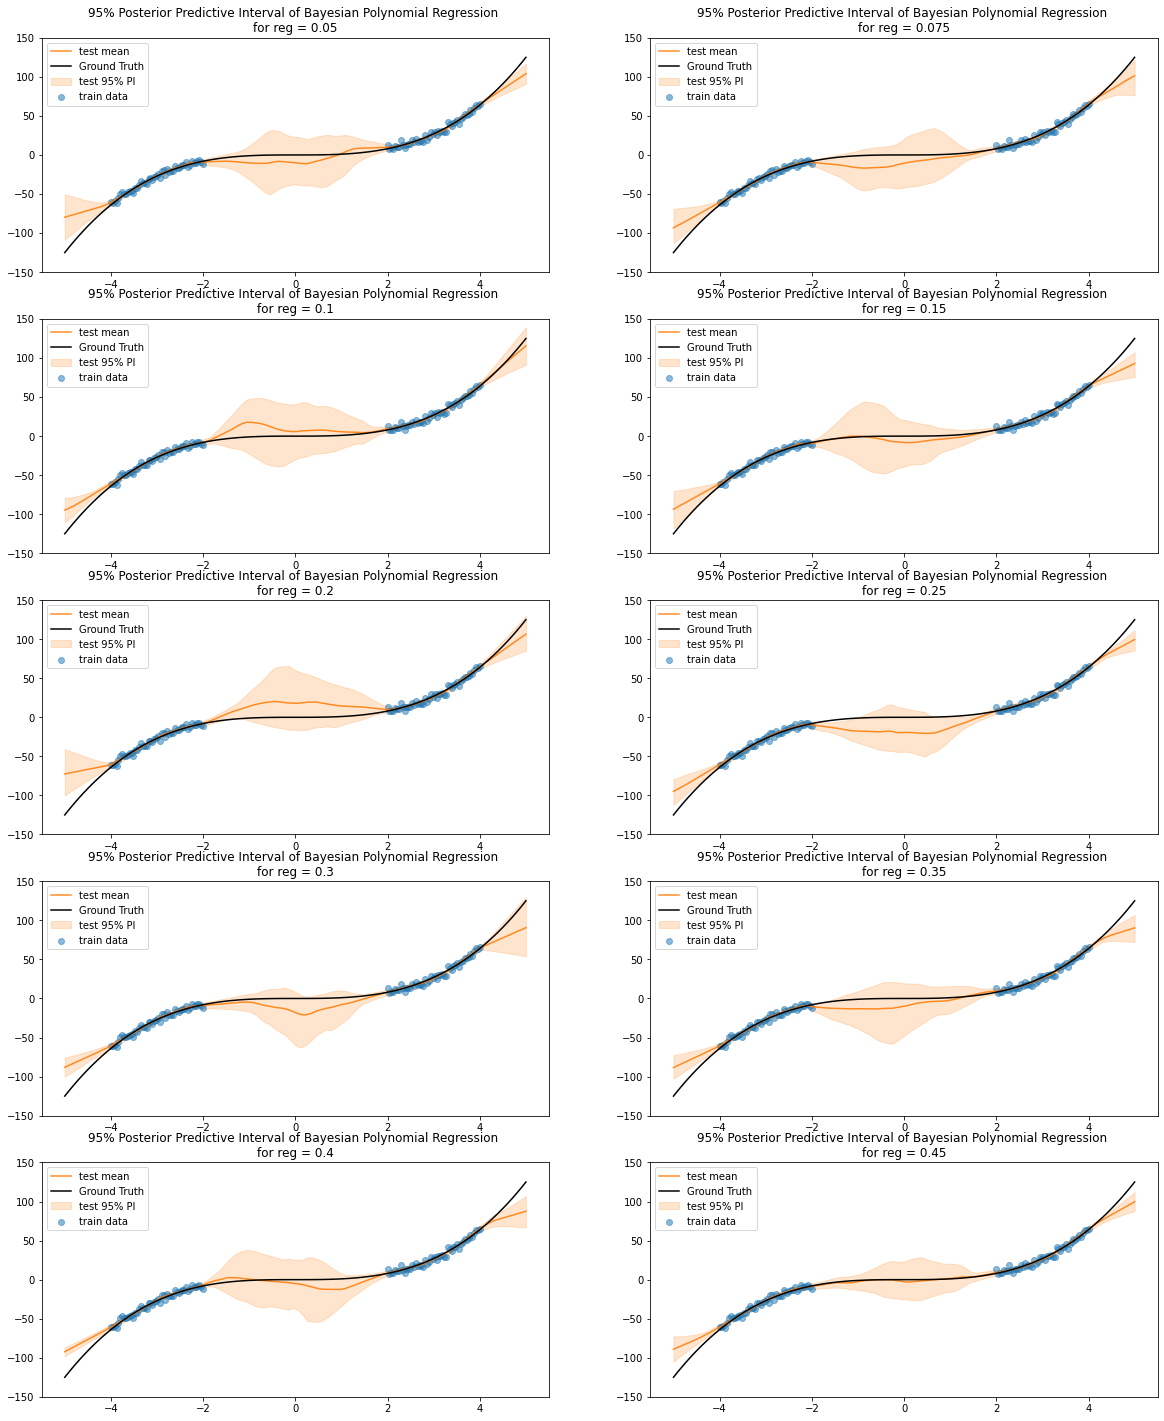

In [25]:
fig, axs = plt.subplots(5, 2, figsize = (20, 25))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    joint_mean, joint_variance, posterior, predictive = nlm.perform_bayesian(x, y, x_test, prior_var = prior_var, noise_var = noise_var)
    
    # Calulating percentiles
    pp_upper = np.percentile(predictive, 97.5, axis=0)
    pp_lower = np.percentile(predictive, 2.5, axis=0)
    pp_mean = np.mean(predictive, axis=0)
    
    # Visualizing 95% posterior predictive interval of Bayesian polynomial regression
    ax.fill_between(x_test, pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
    ax.plot(x_test, pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
    ax.plot(x_test, x_test**3, color='black', label="Ground Truth")
    ax.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("95% Posterior Predictive Interval of Bayesian Polynomial Regression \nfor reg = {}".format(reg_params[i]))

plt.show()

## Random State

**Question:** How often does NLM result in good epsistemic uncertainty? 

### Regularization Parameter = 0.5

In [28]:
rand_states = np.random.randint(0, 1e5, size = 20)
rand_states

array([90155, 72857, 48610, 51373, 38996, 98942,  3520, 48402, 56916,
        3448, 85721, 34216, 58874, 61020, 22556, 36722, 69574, 68512,
       15967, 18095])

In [29]:
nlms = []

for rand_state in rand_states:
    print("Random seed: {}".format(rand_state))
    random = np.random.RandomState(rand_state)
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params, reg_param = 0.5)
    print("")

Random seed: 0.45
Iteration 0 lower bound 4402.423288325283; gradient mag: 9698.973593992254
Iteration 100 lower bound 117.05734016091333; gradient mag: 371.75557475191266
Iteration 200 lower bound 79.88515729869364; gradient mag: 96.70746266400556
Iteration 300 lower bound 58.85141500583337; gradient mag: 64.7732757074521
Iteration 400 lower bound 46.95056135477572; gradient mag: 46.93034828850329
Iteration 500 lower bound 40.06566047169403; gradient mag: 35.87001454754655
Iteration 600 lower bound 35.72235353325129; gradient mag: 29.267030241743317
Iteration 700 lower bound 32.82022670698722; gradient mag: 23.323431254114414
Iteration 800 lower bound 30.793628525409115; gradient mag: 18.700591085317342
Iteration 900 lower bound 28.656981938338845; gradient mag: 13.912132588258672
Iteration 1000 lower bound 27.44433848571514; gradient mag: 11.706192163551702
Iteration 1100 lower bound 26.415276541190057; gradient mag: 10.36863826203589
Iteration 1200 lower bound 25.584775503237587; gr

Iteration 400 lower bound 118.67468846777467; gradient mag: 41.980045974920884
Iteration 500 lower bound 109.30320231255038; gradient mag: 41.44610829882955
Iteration 600 lower bound 97.49107659071778; gradient mag: 40.348490591202626
Iteration 700 lower bound 79.85104673569809; gradient mag: 40.3084645758956
Iteration 800 lower bound 57.439111795320684; gradient mag: 33.155021613316
Iteration 900 lower bound 46.370501824612305; gradient mag: 28.37251919349858
Iteration 1000 lower bound 38.824715550033915; gradient mag: 24.33097667539544
Iteration 1100 lower bound 33.59247075648824; gradient mag: 19.515270071689667
Iteration 1200 lower bound 30.12984781723167; gradient mag: 15.700028194514534
Iteration 1300 lower bound 27.692761678817597; gradient mag: 13.227904659365162
Iteration 1400 lower bound 25.94233161036548; gradient mag: 10.127096076405074
Iteration 1500 lower bound 24.450088865030125; gradient mag: 12.588373836327795
Iteration 1600 lower bound 22.563343330774337; gradient mag

Iteration 800 lower bound 28.41857313034113; gradient mag: 14.964774656477871
Iteration 900 lower bound 25.571648723577894; gradient mag: 12.230310029158275
Iteration 1000 lower bound 23.858794491123636; gradient mag: 8.52653531187028
Iteration 1100 lower bound 22.567301841347533; gradient mag: 7.649156261233083
Iteration 1200 lower bound 21.545460851887796; gradient mag: 7.487015297620273
Iteration 1300 lower bound 20.965762476769484; gradient mag: 6.766573570546635
Iteration 1400 lower bound 20.533012339089495; gradient mag: 6.486825603771769
Iteration 1500 lower bound 20.27127548204878; gradient mag: 4.085029500702344
Iteration 1600 lower bound 20.128187539367673; gradient mag: 3.5007457027067717
Iteration 1700 lower bound 20.01260130047679; gradient mag: 1.3456852783438091
Iteration 1800 lower bound 19.89054729974685; gradient mag: 1.5297764184197598
Iteration 1900 lower bound 19.787441624974637; gradient mag: 1.66937175467914
Iteration 2000 lower bound 19.687879990594396; gradient

Iteration 1200 lower bound 27.859167627747986; gradient mag: 11.170763191356125
Iteration 1300 lower bound 26.761318764934526; gradient mag: 9.487316244644543
Iteration 1400 lower bound 25.922721831554398; gradient mag: 8.246870396059123
Iteration 1500 lower bound 25.14288021453526; gradient mag: 7.4221021050769656
Iteration 1600 lower bound 24.569650544333903; gradient mag: 6.848355587051945
Iteration 1700 lower bound 24.100212188186717; gradient mag: 5.73568573655133
Iteration 1800 lower bound 23.73369249689234; gradient mag: 5.183732865818499
Iteration 1900 lower bound 23.3285769455085; gradient mag: 3.9617225634605484
Iteration 2000 lower bound 22.960596172580935; gradient mag: 3.5681331473208453
Iteration 2100 lower bound 22.74789174296955; gradient mag: 5.872965418930581
Iteration 2200 lower bound 22.57902264315471; gradient mag: 3.7275883885644108
Iteration 2300 lower bound 22.43525829401025; gradient mag: 3.608756019121817
Iteration 2400 lower bound 22.30478391514157; gradient 

Iteration 1600 lower bound 23.993815877809766; gradient mag: 9.257260200579202
Iteration 1700 lower bound 23.336616258548574; gradient mag: 8.665079300996085
Iteration 1800 lower bound 22.77522622549703; gradient mag: 7.682081969897791
Iteration 1900 lower bound 22.310994240518855; gradient mag: 7.3595462540002545
Iteration 2000 lower bound 21.922188440809546; gradient mag: 6.739389289488836
Iteration 2100 lower bound 21.611823477649324; gradient mag: 5.57976185398965
Iteration 2200 lower bound 21.359220172738453; gradient mag: 4.583893647482062
Iteration 2300 lower bound 21.161067827967983; gradient mag: 5.378357499716313
Iteration 2400 lower bound 21.00353191228695; gradient mag: 3.3913458544316386
Iteration 2500 lower bound 20.879318745935667; gradient mag: 4.065470181045252
Iteration 2600 lower bound 20.75876122431577; gradient mag: 5.935830883768147
Iteration 2700 lower bound 20.647885882754863; gradient mag: 3.277571413146638
Iteration 2800 lower bound 20.554764546418; gradient m

Iteration 2000 lower bound 22.04671634193556; gradient mag: 4.2661079910978685
Iteration 2100 lower bound 21.632555057986423; gradient mag: 3.6169593054470983
Iteration 2200 lower bound 21.309413113799685; gradient mag: 3.9227531588585265
Iteration 2300 lower bound 21.071354862017117; gradient mag: 2.729127482043341
Iteration 2400 lower bound 20.89237738851793; gradient mag: 2.940239167896297
Iteration 2500 lower bound 20.70680547673434; gradient mag: 2.5846079279185834
Iteration 2600 lower bound 20.56906367193371; gradient mag: 2.0783571607990994
Iteration 2700 lower bound 20.454318140775595; gradient mag: 1.5712913218427946
Iteration 2800 lower bound 20.35236895720353; gradient mag: 1.692011097240408
Iteration 2900 lower bound 20.261190740797197; gradient mag: 1.9310099189671777
Iteration 3000 lower bound 20.076541159760698; gradient mag: 1.6922354908735264
Iteration 3100 lower bound 19.964999737933525; gradient mag: 2.2708648424983497
Iteration 3200 lower bound 19.875755404629224; g

Iteration 2400 lower bound 22.829442244058583; gradient mag: 5.706299682255292
Iteration 2500 lower bound 22.56928981393971; gradient mag: 4.987953678368466
Iteration 2600 lower bound 22.29579842726369; gradient mag: 5.600690491618922
Iteration 2700 lower bound 22.10447733002193; gradient mag: 3.9792823906340833
Iteration 2800 lower bound 21.960099491095804; gradient mag: 3.4053113517589235
Iteration 2900 lower bound 21.81579142518028; gradient mag: 4.557017859555889
Iteration 3000 lower bound 21.712110478801126; gradient mag: 3.1256201051003476
Iteration 3100 lower bound 21.61580585105304; gradient mag: 2.7889120236509295
Iteration 3200 lower bound 21.53140004699841; gradient mag: 2.3190203301843515
Iteration 3300 lower bound 21.428929768881275; gradient mag: 2.375963186547162
Iteration 3400 lower bound 21.36560653302731; gradient mag: 2.10548484059296
Iteration 3500 lower bound 21.309904306358856; gradient mag: 2.8073035634550405
Iteration 3600 lower bound 21.168555278307863; gradien

Iteration 2800 lower bound 19.518487317505713; gradient mag: 1.9018285928616476
Iteration 2900 lower bound 19.44309719810941; gradient mag: 2.211598606665696
Iteration 3000 lower bound 19.367539063174565; gradient mag: 2.22558367000352
Iteration 3100 lower bound 19.29234185467463; gradient mag: 1.1401811039888192
Iteration 3200 lower bound 19.218555536680924; gradient mag: 1.5527285899845487
Iteration 3300 lower bound 19.14476592635664; gradient mag: 1.0249852132136406
Iteration 3400 lower bound 19.07126262496331; gradient mag: 1.116565652125545
Iteration 3500 lower bound 18.998060578710685; gradient mag: 1.421199481666243
Iteration 3600 lower bound 18.925048579495265; gradient mag: 1.7266717602385537
Iteration 3700 lower bound 18.851582905240917; gradient mag: 1.2350362999554958
Iteration 3800 lower bound 18.77883028467282; gradient mag: 2.4815072633728157
Iteration 3900 lower bound 18.705995450192347; gradient mag: 2.0972401493918835
Iteration 4000 lower bound 18.63291593366571; grad

Iteration 3200 lower bound 20.65852506211867; gradient mag: 2.4389344776040702
Iteration 3300 lower bound 20.596192493038156; gradient mag: 2.8522198384025685
Iteration 3400 lower bound 20.533824887169743; gradient mag: 2.423021729269519
Iteration 3500 lower bound 20.475287515176472; gradient mag: 2.2058780301395813
Iteration 3600 lower bound 20.420510270305968; gradient mag: 2.5483743624751636
Iteration 3700 lower bound 20.36952274870079; gradient mag: 3.5708544373348174
Iteration 3800 lower bound 20.318500230591845; gradient mag: 3.5903880120372436
Iteration 3900 lower bound 20.269885248479312; gradient mag: 1.4624060517134951
Iteration 4000 lower bound 20.22187757099054; gradient mag: 1.2989753166396683
Iteration 4100 lower bound 20.169238043132296; gradient mag: 4.09928283785694
Iteration 4200 lower bound 20.111545062259285; gradient mag: 1.5844037938979854
Iteration 4300 lower bound 20.05194002720387; gradient mag: 1.2842849491392905
Iteration 4400 lower bound 19.99117761320859; g

Iteration 3600 lower bound 17.907928801689113; gradient mag: 3.2013216213392037
Iteration 3700 lower bound 17.837995694462332; gradient mag: 3.1288012521478317
Iteration 3800 lower bound 17.76714936305826; gradient mag: 2.576674844394398
Iteration 3900 lower bound 17.69734990351734; gradient mag: 3.2830174111964667
Iteration 4000 lower bound 17.62753202279415; gradient mag: 4.074486037452633
Iteration 4100 lower bound 17.555468922168327; gradient mag: 3.0764925305802837
Iteration 4200 lower bound 17.48472361455753; gradient mag: 3.3311308112931695
Iteration 4300 lower bound 17.412161451947505; gradient mag: 2.099267833164092
Iteration 4400 lower bound 17.32828770236862; gradient mag: 3.423785661655632
Iteration 4500 lower bound 17.251249338625737; gradient mag: 3.7744357105634405
Iteration 4600 lower bound 17.172841614900282; gradient mag: 4.683143745375989
Iteration 4700 lower bound 17.096081492315605; gradient mag: 3.745247660199694
Iteration 4800 lower bound 17.019276359945454; grad

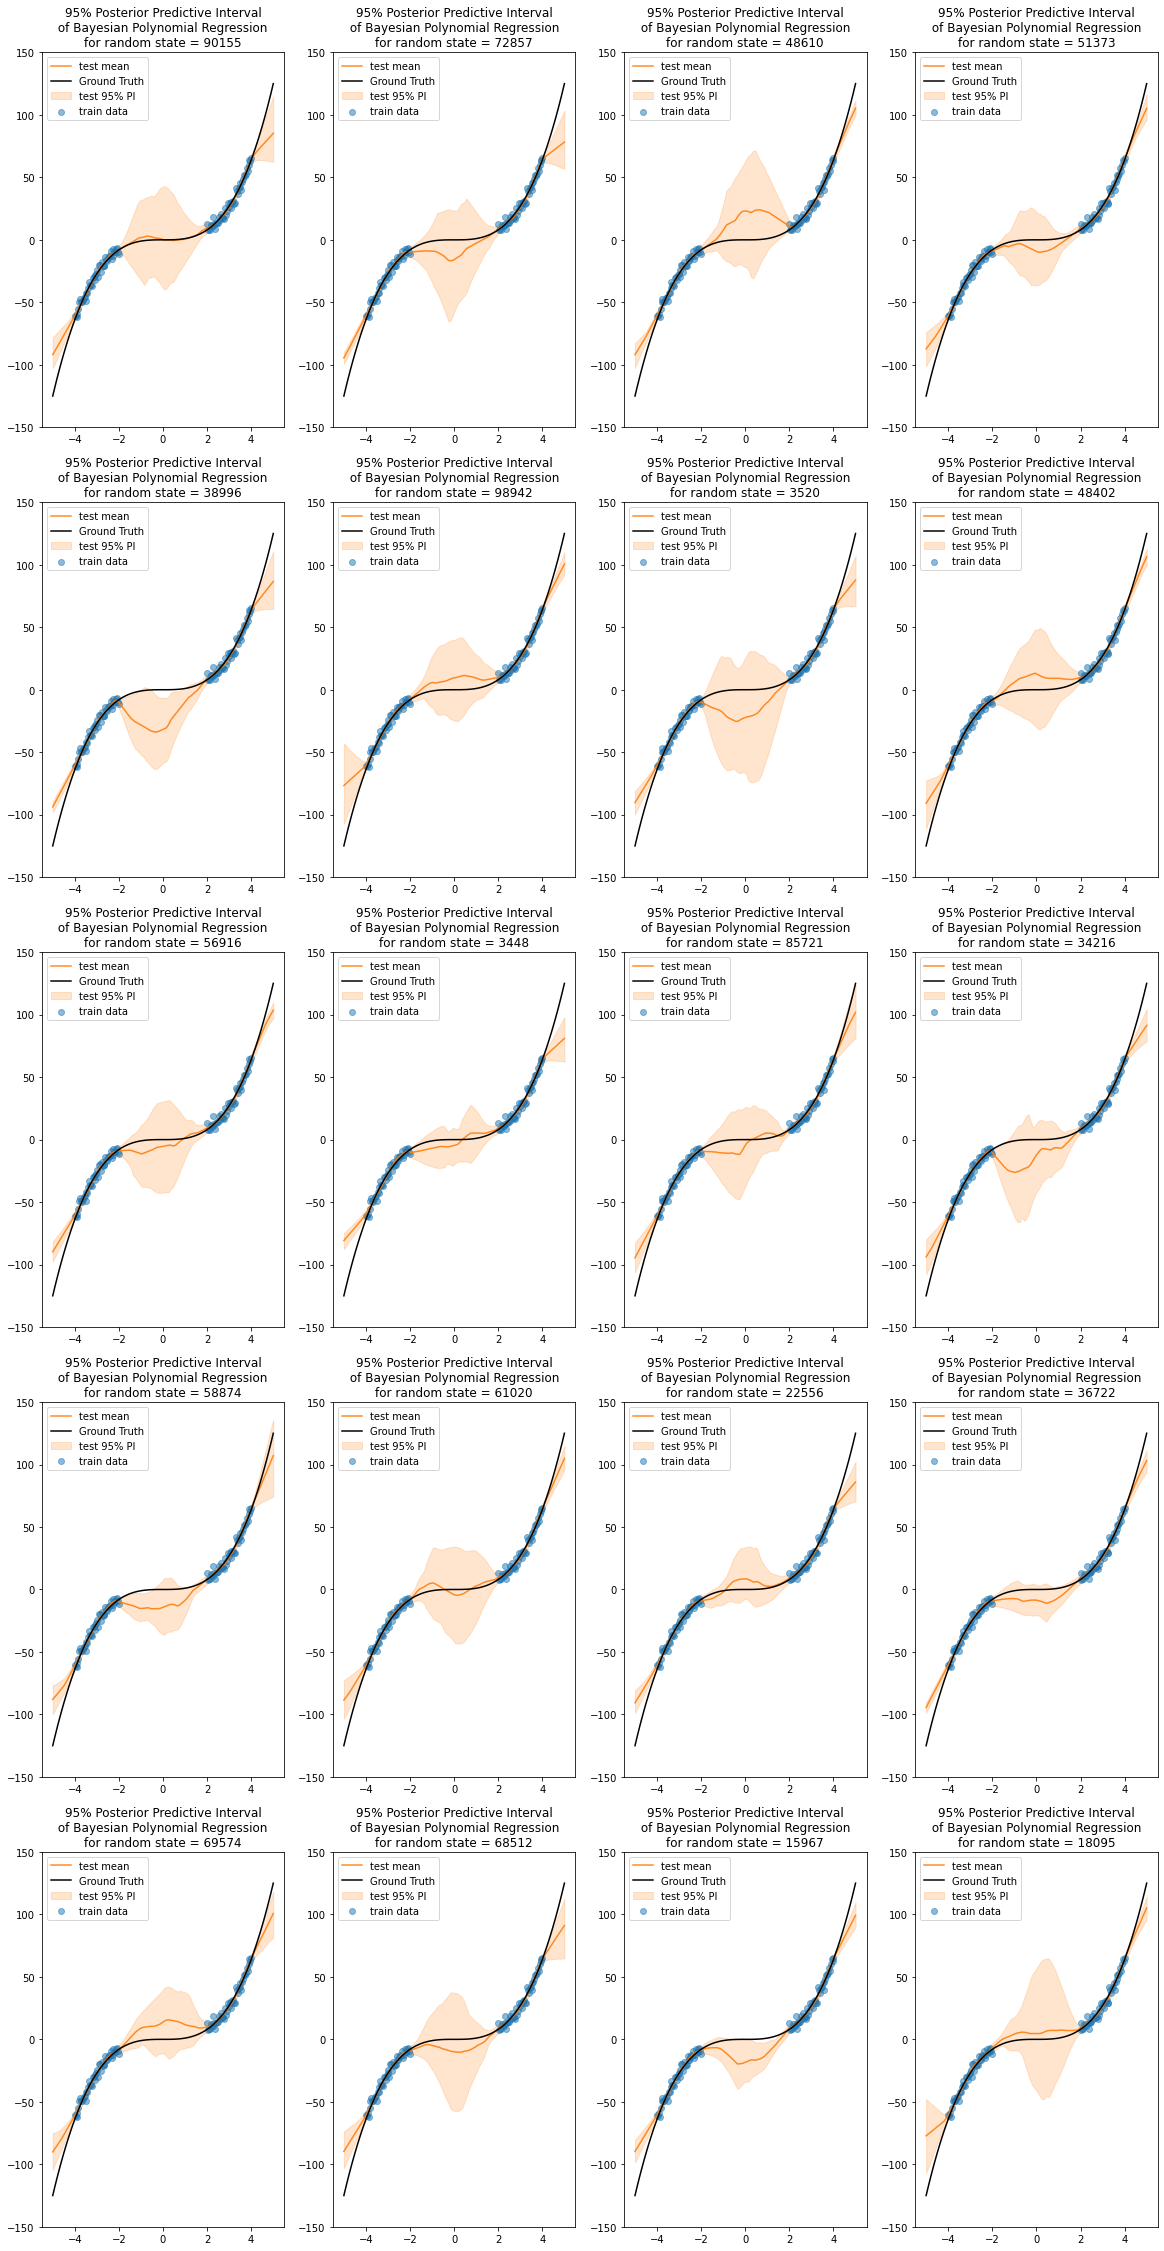

In [34]:
fig, axs = plt.subplots(5, 4, figsize = (20, 40))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    joint_mean, joint_variance, posterior, predictive = nlm.perform_bayesian(x, y, x_test, prior_var = prior_var, noise_var = noise_var)
    
    # Calulating percentiles
    pp_upper = np.percentile(predictive, 97.5, axis=0)
    pp_lower = np.percentile(predictive, 2.5, axis=0)
    pp_mean = np.mean(predictive, axis=0)
    
    # Visualizing 95% posterior predictive interval of Bayesian polynomial regression
    ax.fill_between(x_test, pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
    ax.plot(x_test, pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
    ax.plot(x_test, x_test**3, color='black', label="Ground Truth")
    ax.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("95% Posterior Predictive Interval\n of Bayesian Polynomial Regression \nfor random state = {}".format(rand_states[i]))

plt.show()

About 8 of the 20 models give what we would consider good epistemic uncertainty behaviors. 

In [35]:
rand_states = np.random.randint(0, 1e5, size = 20)

nlms = []

for rand_state in rand_states:
    print("Random seed: {}".format(rand_state))
    random = np.random.RandomState(rand_state)
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params, reg_param = 0.5)
    print("")

Random seed: 66825
Iteration 0 lower bound 1119.2284392099866; gradient mag: 2158.7993499114623
Iteration 100 lower bound 97.64999565397274; gradient mag: 113.11528069411368
Iteration 200 lower bound 82.63107300585722; gradient mag: 52.19216554345554
Iteration 300 lower bound 67.21913362856654; gradient mag: 49.233075488118395
Iteration 400 lower bound 48.72015839127849; gradient mag: 46.64463146124009
Iteration 500 lower bound 37.309586369870566; gradient mag: 32.75102164774104
Iteration 600 lower bound 30.432160784432845; gradient mag: 22.849002637410223
Iteration 700 lower bound 26.064226995658952; gradient mag: 10.63174947504025
Iteration 800 lower bound 24.032052981546855; gradient mag: 7.334438364334691
Iteration 900 lower bound 22.982743657801848; gradient mag: 5.131690151258576
Iteration 1000 lower bound 22.29981915956591; gradient mag: 5.2675688813277475
Iteration 1100 lower bound 21.794262670658384; gradient mag: 3.239298697048411
Iteration 1200 lower bound 21.480306770436236

Iteration 400 lower bound 65.31591194632458; gradient mag: 35.29380866491484
Iteration 500 lower bound 52.411426964187044; gradient mag: 30.86750424021942
Iteration 600 lower bound 42.59222793783019; gradient mag: 25.760404492919353
Iteration 700 lower bound 36.08172322803634; gradient mag: 21.262978630863607
Iteration 800 lower bound 31.807999892792488; gradient mag: 16.693225616310833
Iteration 900 lower bound 29.01232576946363; gradient mag: 12.86211126260571
Iteration 1000 lower bound 26.886672112912578; gradient mag: 11.156705431604532
Iteration 1100 lower bound 25.340548486726526; gradient mag: 9.009717475306356
Iteration 1200 lower bound 24.221666324411352; gradient mag: 7.190833704000733
Iteration 1300 lower bound 23.368329603257685; gradient mag: 6.145075593742226
Iteration 1400 lower bound 22.6435832998461; gradient mag: 5.4519702756267225
Iteration 1500 lower bound 22.08295795272594; gradient mag: 4.142505799504428
Iteration 1600 lower bound 21.62086728040115; gradient mag: 

Iteration 800 lower bound 44.18988627721079; gradient mag: 69.81978048936661
Iteration 900 lower bound 36.229617424815686; gradient mag: 35.77911209138825
Iteration 1000 lower bound 30.967467773777415; gradient mag: 27.405473119045933
Iteration 1100 lower bound 27.609730760612806; gradient mag: 19.704113973192605
Iteration 1200 lower bound 25.48926834425847; gradient mag: 15.023789751984047
Iteration 1300 lower bound 24.016851416157962; gradient mag: 8.867858490449661
Iteration 1400 lower bound 22.290785122326277; gradient mag: 5.299253850434044
Iteration 1500 lower bound 21.61907023854371; gradient mag: 3.840186593242314
Iteration 1600 lower bound 21.387388165551734; gradient mag: 5.457945109749341
Iteration 1700 lower bound 21.266566356794137; gradient mag: 2.042961758022442
Iteration 1800 lower bound 21.138921005641667; gradient mag: 4.167255188879936
Iteration 1900 lower bound 21.032661460925215; gradient mag: 2.3421494494954676
Iteration 2000 lower bound 20.931697153493282; gradie

Iteration 1200 lower bound 46.71126716885508; gradient mag: 62.44974081878794
Iteration 1300 lower bound 43.461399644080814; gradient mag: 28.978228023197047
Iteration 1400 lower bound 40.85499529341855; gradient mag: 29.447498942332167
Iteration 1500 lower bound 38.16298797157938; gradient mag: 31.951860128749047
Iteration 1600 lower bound 35.08598461971064; gradient mag: 37.75848106956352
Iteration 1700 lower bound 30.899766992504116; gradient mag: 47.73661042894756
Iteration 1800 lower bound 27.18497138731584; gradient mag: 28.26378433318907
Iteration 1900 lower bound 25.713025508774876; gradient mag: 11.589095915123359
Iteration 2000 lower bound 25.019396149473437; gradient mag: 8.910805770411208
Iteration 2100 lower bound 24.484978794063835; gradient mag: 8.057632308871458
Iteration 2200 lower bound 24.004056040364386; gradient mag: 7.494395685276727
Iteration 2300 lower bound 23.57178977020525; gradient mag: 7.564460429399499
Iteration 2400 lower bound 23.19688080855489; gradient

Iteration 1600 lower bound 20.733268496421204; gradient mag: 2.4575224964502063
Iteration 1700 lower bound 20.462168286409046; gradient mag: 2.007221918498093
Iteration 1800 lower bound 20.254756467430134; gradient mag: 2.604025898116012
Iteration 1900 lower bound 20.08667704635617; gradient mag: 2.723498638248866
Iteration 2000 lower bound 19.94582209386705; gradient mag: 2.2629140422504004
Iteration 2100 lower bound 19.817674880177073; gradient mag: 2.482679036033964
Iteration 2200 lower bound 19.686941979377295; gradient mag: 1.0177228802724811
Iteration 2300 lower bound 19.570124489513145; gradient mag: 1.8467962287433615
Iteration 2400 lower bound 19.442021469698137; gradient mag: 1.5784084390227602
Iteration 2500 lower bound 19.32235302092163; gradient mag: 0.7823708055820873
Iteration 2600 lower bound 19.211809292102156; gradient mag: 1.6355717294165377
Iteration 2700 lower bound 19.10440320776478; gradient mag: 0.7182247382398291
Iteration 2800 lower bound 18.99895226766664; gr

Iteration 2000 lower bound 20.963175829119322; gradient mag: 1.7840240512980812
Iteration 2100 lower bound 20.865526145576798; gradient mag: 4.350413846272151
Iteration 2200 lower bound 20.77004515478142; gradient mag: 2.2999657050618727
Iteration 2300 lower bound 20.678130131007613; gradient mag: 3.610814645063796
Iteration 2400 lower bound 20.58910699183604; gradient mag: 4.28319688023412
Iteration 2500 lower bound 20.50037543440883; gradient mag: 4.881357252951652
Iteration 2600 lower bound 20.41323023762689; gradient mag: 1.9498559726209739
Iteration 2700 lower bound 20.327046230994036; gradient mag: 2.5240041594011053
Iteration 2800 lower bound 20.241109901753596; gradient mag: 1.1352369265066728
Iteration 2900 lower bound 20.156760005719384; gradient mag: 4.7047822656799685
Iteration 3000 lower bound 20.07104041054987; gradient mag: 1.2012825303720767
Iteration 3100 lower bound 19.986177902010123; gradient mag: 1.0956788270543396
Iteration 3200 lower bound 19.902041769032216; gra

Iteration 2400 lower bound 20.712991849642574; gradient mag: 2.345530287253687
Iteration 2500 lower bound 20.570177594494385; gradient mag: 2.4701898909070694
Iteration 2600 lower bound 20.451730377236128; gradient mag: 2.5730870076269
Iteration 2700 lower bound 20.34978134595; gradient mag: 1.5141166043403138
Iteration 2800 lower bound 20.26254372324278; gradient mag: 1.3085199179615872
Iteration 2900 lower bound 20.185350774424826; gradient mag: 2.4666843680971913
Iteration 3000 lower bound 20.11573750270088; gradient mag: 3.6736157937580187
Iteration 3100 lower bound 20.054938343670933; gradient mag: 3.4353397255702185
Iteration 3200 lower bound 20.00106505968445; gradient mag: 2.8718464994688064
Iteration 3300 lower bound 19.9536754829262; gradient mag: 3.0711300180195997
Iteration 3400 lower bound 19.905632060821553; gradient mag: 4.579404023247428
Iteration 3500 lower bound 19.862618870150015; gradient mag: 3.644327250805304
Iteration 3600 lower bound 19.819138662111595; gradient

Iteration 2800 lower bound 19.189600648757835; gradient mag: 1.6501478704146892
Iteration 2900 lower bound 19.12304479423959; gradient mag: 1.2314881735535608
Iteration 3000 lower bound 19.056119975267503; gradient mag: 2.0278599717505648
Iteration 3100 lower bound 18.991950263274866; gradient mag: 1.10029067336227
Iteration 3200 lower bound 18.929341757245655; gradient mag: 2.1152776209023223
Iteration 3300 lower bound 18.867035305773925; gradient mag: 2.1668870548911205
Iteration 3400 lower bound 18.80449108535307; gradient mag: 0.7486187677747509
Iteration 3500 lower bound 18.74360241317546; gradient mag: 2.1611096896849786
Iteration 3600 lower bound 18.682728838991867; gradient mag: 1.339837452389695
Iteration 3700 lower bound 18.622810449337386; gradient mag: 1.9695683932246417
Iteration 3800 lower bound 18.563131707672994; gradient mag: 1.8557507456281532
Iteration 3900 lower bound 18.505167085754998; gradient mag: 2.44483196279836
Iteration 4000 lower bound 18.446543371430046; g

Iteration 3200 lower bound 19.656050145408404; gradient mag: 2.485729580659345
Iteration 3300 lower bound 19.58929021976919; gradient mag: 3.8654472922949528
Iteration 3400 lower bound 19.525654456884514; gradient mag: 2.0525494120556615
Iteration 3500 lower bound 19.46376422206251; gradient mag: 2.1236109523541487
Iteration 3600 lower bound 19.402013558611955; gradient mag: 1.4010208203873886
Iteration 3700 lower bound 19.340580466322937; gradient mag: 1.7550840107790608
Iteration 3800 lower bound 19.279135927214412; gradient mag: 1.4432304145206558
Iteration 3900 lower bound 19.216908048732705; gradient mag: 2.242234763239842
Iteration 4000 lower bound 19.154071845873965; gradient mag: 1.9534228244229874
Iteration 4100 lower bound 19.090716545093468; gradient mag: 3.567342493021226
Iteration 4200 lower bound 19.026685566508853; gradient mag: 2.612272697054463
Iteration 4300 lower bound 18.961920202435206; gradient mag: 2.081574629739533
Iteration 4400 lower bound 18.89678226810127; g

Iteration 3600 lower bound 17.41751864007847; gradient mag: 0.9401941627623217
Iteration 3700 lower bound 17.307646339685668; gradient mag: 3.2973644694398208
Iteration 3800 lower bound 17.19543955502718; gradient mag: 2.108699597523375
Iteration 3900 lower bound 17.08202762805535; gradient mag: 0.7115160302533312
Iteration 4000 lower bound 16.970427739899627; gradient mag: 1.693314388298924
Iteration 4100 lower bound 16.85896484157246; gradient mag: 4.635832408676932
Iteration 4200 lower bound 16.7457392517348; gradient mag: 3.666719622595336
Iteration 4300 lower bound 16.631700161018678; gradient mag: 1.5350026077475802
Iteration 4400 lower bound 16.519631080530594; gradient mag: 1.9098250971092179
Iteration 4500 lower bound 16.410750748190846; gradient mag: 5.090467886554552
Iteration 4600 lower bound 16.29680697289381; gradient mag: 1.3558125192860748
Iteration 4700 lower bound 16.18491373463144; gradient mag: 2.658994510004223
Iteration 4800 lower bound 16.071565275470824; gradien

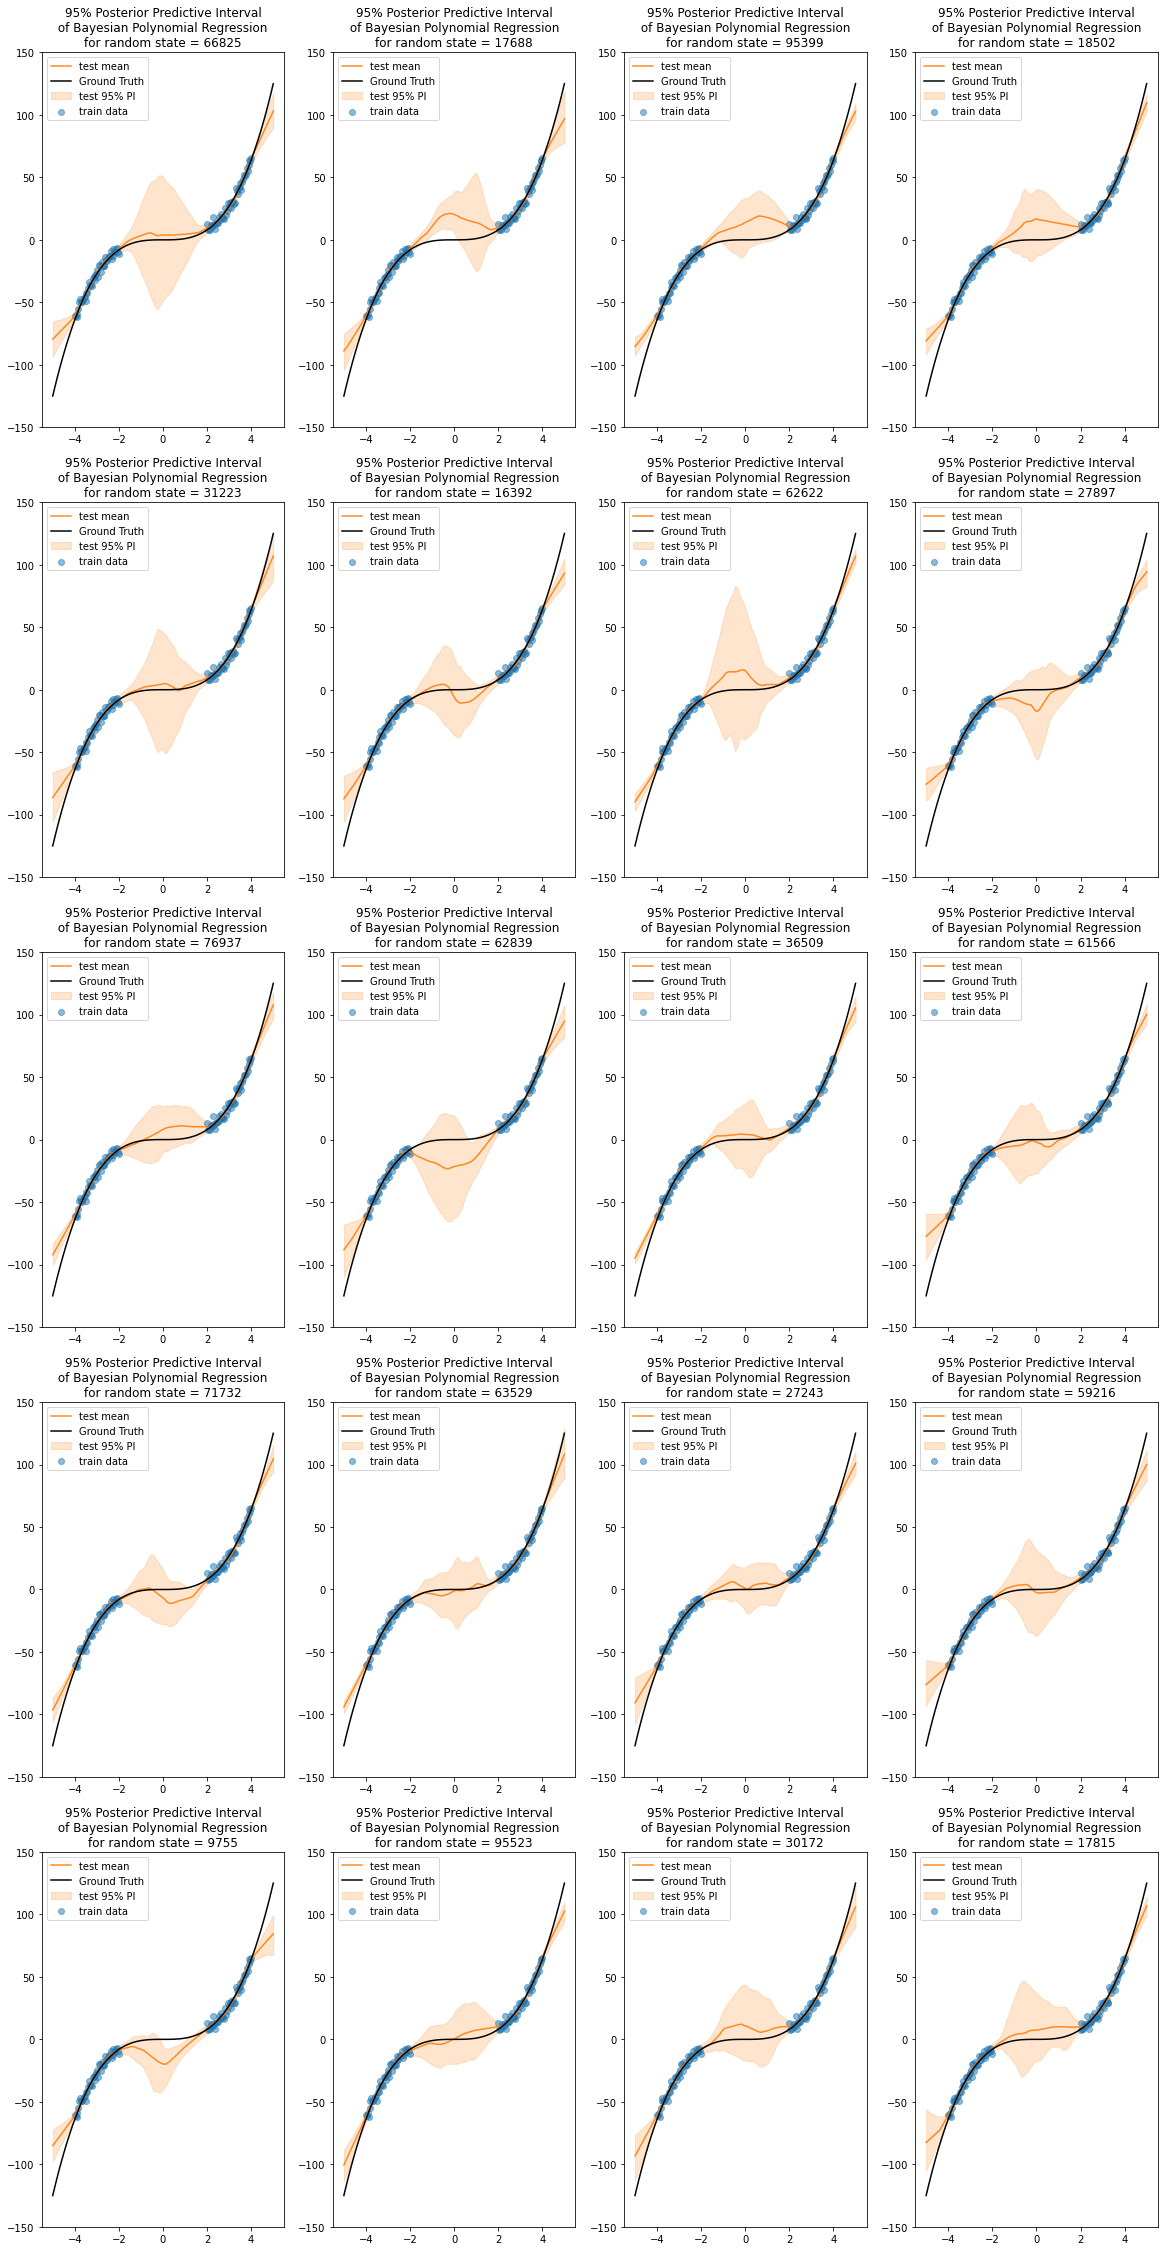

In [36]:
fig, axs = plt.subplots(5, 4, figsize = (20, 40))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    joint_mean, joint_variance, posterior, predictive = nlm.perform_bayesian(x, y, x_test, prior_var = prior_var, noise_var = noise_var)
    
    # Calulating percentiles
    pp_upper = np.percentile(predictive, 97.5, axis=0)
    pp_lower = np.percentile(predictive, 2.5, axis=0)
    pp_mean = np.mean(predictive, axis=0)
    
    # Visualizing 95% posterior predictive interval of Bayesian polynomial regression
    ax.fill_between(x_test, pp_upper, pp_lower, color = 'tab:orange', alpha = 0.2, label = 'test 95% PI')
    ax.plot(x_test, pp_mean, color = 'tab:orange', alpha = 0.9, label = 'test mean')
    ax.plot(x_test, x_test**3, color='black', label="Ground Truth")
    ax.scatter(x, y, color = "tab:blue", label = "train data", alpha = 0.5)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("95% Posterior Predictive Interval\n of Bayesian Polynomial Regression \nfor random state = {}".format(rand_states[i]))

plt.show()

About 6 out of the 20 models give what we would consider good epistemic uncertainty behavior. 

In total, about 14 of the 40 models, so about 35% gave good epistemic uncertainty behavior. 